<a href="https://colab.research.google.com/github/knxghtly/python-tensorflow-MLDL-Study/blob/main/%5B5%5D%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95(Stochastic_Gradient_Descent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

특정한 회귀나 분류 알고리즘이 아니라, 모델을 학습하는 최적화 방법(Optimization Algorithm)

손실 함수(loss function)의 기울기(gradient)를 이용해 가중치를 업데이트하는 방식

**SGD를 적용할 수 있는 모델 예시**
 * 회귀(Regression)
  * 선형 회귀(Linear Regression)
  * 릿지 회귀(Ridge Regression)
  * 라쏘 회귀(Lasso Regression)
 * 분류(Classification)
  * 로지스틱 회귀(Logistic Regression)
  * 서포트 벡터 머신(SVM) (확률적 경사 하강법으로 최적화 가능)
  * 신경망(Neural Networks) (딥러닝에서 기본적인 최적화 방법 중 하나)
 * 기타 머신러닝 모델
  * 확률적 그래디언트 부스팅(SGDBoost) 같은 앙상블 기법에서도 사용 가능

#회귀 모델에서 쓰는 손실 함수
 * MSE(Mean Squared Error, 평균 제곱 오차)
 * MAE(Mean Absolute Error, 평균 절대 오차)

✔ 사용하는 모델 예시
 * 선형 회귀(Linear Regression)
 * 릿지 회귀(Ridge Regression)
 * 라쏘 회귀(Lasso Regression)

#분류 모델에서 쓰는 손실 함수
##1. 로지스틱 손실 함수

분류 모델에서는 정확도를 가지고 성능을 평가하기 때문에, 미분불가(SGD사용불가)

그래서 로지스틱 손실 함수 사용.

| 예측값 \( ̂y \) | 실제값 \( y \) | 손실 \( L(y, ̂y) \) | 손실 크기 |
|------|------|----------------|------|
| 0.9  | 1    | \( - (1 × log0.9 + 0 × log(1 - 0.9)) = **0.105** \) | 낮은 손실 |
| 0.3  | 1    | \( - (1 × log 0.3 + 0 × log (1 - 0.3)) = **1.204** \) | 높은 손실 |
| 0.2  | 0    | \( - (0 × log 0.2 + 1 × log (1 - 0.2)) = **0.223** \) | 낮은 손실 |
| 0.8  | 0    | \( - (0 × log 0.8 + 1 × log (1 - 0.8)) = **1.609** \) | 높은 손실 |



✔ 사용하는 모델 예시
 * 로지스틱 회귀(Logistic Regression)
 * 신경망(Neural Networks) → 소프트맥스와 함께 다중 분류에 활용
 * 서포트 벡터 머신(SVM) (로지스틱 손실을 변형하여 사용 가능)

#0. 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# data loading
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish_input = fish[["Weight","Length","Diagonal","Height","Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()

# train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)
print(train_input.shape)
print(test_input.shape)

# 경사하강법에서는 꼭 scale을 조정해야함
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

(119, 5)
(40, 5)


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


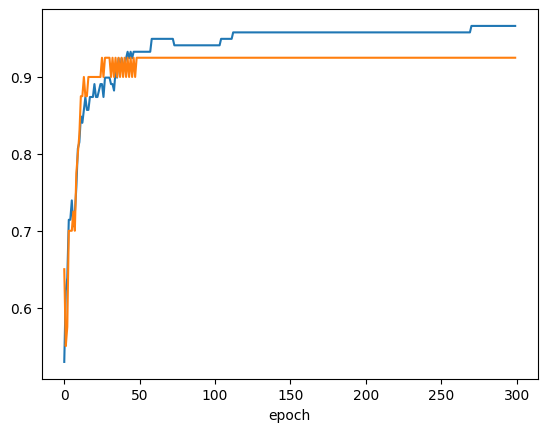

0.957983193277311
0.925


In [ ]:
# SGD가 있는 모듈 (회귀일 때는 SGDRegressor)
from sklearn.linear_model import SGDClassifier
# loss="log_loss": 로지스틱 손실함수 지정
sc = SGDClassifier(loss="log_loss", random_state=42)

train_score, test_score = [], []
classes = np.unique(train_target) # .unique: 중복데이터 X
print(classes)
epoch = 300

for i in range(epoch):
  # fit: 새로 학습 / partial_fit: 한번 더 학습
  # classes=: class는 fit을 통해서만 학습하므로,
  # partial_fit을 처음부터 쓰려면
  # 가능한 클래스 목록(np.unique(train_target))을 줘야함
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

plt.plot(range(epoch), train_score, label='Train Score')
plt.plot(range(epoch), test_score, label='Test Score')
plt.xlabel("epoch")
plt.show()

# 두 번째 SGDClassifier
# 조기 종료 예시임. 그래프에서 100번 epoch가 적당해 보이므로 100번반복
# tol은 허용 오차(tolerance): 학습을 종료 조건. None이니까 100번모두반복
sc = SGDClassifier(loss="log_loss", max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))